In [264]:
import pandas as pd
import matplotlib.pyplot as plt


In [265]:
#read data from file
dfHouseHoldEmployment = pd.read_csv('/home/dside/Documents/vc-workshop/Youth/YOUTH_HOUSEHOLD_EMPLOYMENT_South_Africa.csv',skipinitialspace=True)
dfHouseHoldCrowded = pd.read_csv('/home/dside/Documents/vc-workshop/Youth/YOUTH_HOUSEHOLD_CROWDED_GENDER_South_Africa.csv',skipinitialspace=True)
dfEmploymentSector = pd.read_csv('/home/dside/Documents/vc-workshop/Youth/YOUTH_EMPLOYMENT_SECTOR_GENDER_South_Africa.csv',skipinitialspace=True)
dfTypeOfDwelling = pd.read_csv('/home/dside/Documents/vc-workshop/Youth/YOUTH_TYPE_OF_DWELLING_GENDER_South_Africa.csv',skipinitialspace=True)
dfDifficulty = pd.read_csv('/home/dside/Documents/vc-workshop/Youth/YOUTH_DIFFICULTY_FUNCTIONING_South_Africa.csv',skipinitialspace=True)
dfTypesOfAreas = pd.read_csv('/home/dside/Documents/vc-workshop/Youth/YOUTH_TYPE_OF_AREA_South_Africa.csv',skipinitialspace=True)

In [266]:
#Building difficulties measuring values in percentages 
dfDifficulty["difficulty_measure"] = dfDifficulty.loc[:,'Communication':'Walking'].sum(axis =1) / dfDifficulty.youth * 100
dfDifficulty.head(1)



,geo_level,geo_code,geoid,name,youth,Communication,"Hearing, even when using a hearing aid",Remembering,"Seeing, even when using eye glasses",Self care,Walking,difficulty_measure
0,country,ZA,country-ZA,South Africa,9012788,77159,133998,137164,398001,92660,80369,10.200517


In [267]:
dfHouseHoldEmployment.head(1)

,geo_level,geo_code,geoid,name,total,At least one employed adult,No employed adult
0,country,ZA,country-ZA,South Africa,9770007,5647743,4122264


In [268]:
dfHouseHoldCrowded.head(1)


,geo_level,geo_code,geoid,name,total,Non-overcrowded,Non-overcrowded-Female,Non-overcrowded-Male,Overcrowded,Overcrowded-Female,Overcrowded-Male
0,country,ZA,country-ZA,South Africa,9432800,7903787,3918261,3985526,1529013,840071,688942


In [269]:
dfEmploymentSector.head(1)

,geo_level,geo_code,geoid,name,total,Do not know,Do not know-Female,Do not know-Male,Formal sector,Formal sector-Female,Formal sector-Male,Informal sector,Informal sector-Female,Informal sector-Male,Private household,Private household-Female,Private household-Male
0,country,ZA,country-ZA,South Africa,1676105,45301,17382,27919,1251607,546152,705455,222118,76135,145983,157079,62851,94228


In [270]:
dfDifficulty.head(1)

,geo_level,geo_code,geoid,name,youth,Communication,"Hearing, even when using a hearing aid",Remembering,"Seeing, even when using eye glasses",Self care,Walking,difficulty_measure
0,country,ZA,country-ZA,South Africa,9012788,77159,133998,137164,398001,92660,80369,10.200517


In [271]:
dfTypeOfDwelling.head(1)

,geo_level,geo_code,geoid,name,total,Formal,Formal-Female,Formal-Male,Informal in backyard,Informal in backyard-Female,Informal in backyard-Male,Informal not in backyard,Informal not in backyard-Female,Informal not in backyard-Male,Other,Other-Female,Other-Male,Traditional,Traditional-Female,Traditional-Male
0,country,ZA,country-ZA,South Africa,9628269,7531820,3805263,3726557,333130,166902,166228,632838,316239,316599,67811,33121,34690,1062670,536449,526221


In [272]:
dfTypesOfAreas.head(1)

,geo_level,geo_code,geoid,name,total,Collective living quarters,Commercial,Farms,Formal residential,Industrial,Informal residential,Parks and recreation,Small holdings,Traditional residential,Vacant
0,country,ZA,country-ZA,South Africa,10378023,171906,71243,379316,5479644,32310,607285,5151,74987,3544142,12039


# Types of Dwelling vs Types of Areas Per Municipality

In [273]:
dfDwellArea  = dfTypeOfDwelling.merge(dfTypesOfAreas, on=['geo_level', 'geo_code', 'geoid', 'name'])

dfDwellArea.drop('Formal-Female', 1,inplace=True)
dfDwellArea.drop('Formal-Male', 1,inplace=True)
dfDwellArea.drop('Informal in backyard-Female', 1,inplace=True)
dfDwellArea.drop('Informal in backyard-Male', 1,inplace=True)
dfDwellArea.drop('Informal not in backyard-Female', 1,inplace=True)
dfDwellArea.drop('Informal not in backyard-Male', 1,inplace=True)
dfDwellArea.drop('Other-Female', 1,inplace=True)
dfDwellArea.drop('Other-Male', 1,inplace=True)
dfDwellArea.drop('Traditional-Female', 1,inplace=True)
dfDwellArea.drop('Traditional-Male', 1,inplace=True)
dfDwellArea = dfDwellArea[dfDwellArea.index != 0]
#f3.drop(f3.index[[0]], 1,inplace=True)
#print (f.shape, f2.shape,f3.shape)
#f3.columns.values
dfDwellArea.head(2)

,geo_level,geo_code,geoid,name,total_x,Formal,Informal in backyard,Informal not in backyard,Other,Traditional,...,Collective living quarters,Commercial,Farms,Formal residential,Industrial,Informal residential,Parks and recreation,Small holdings,Traditional residential,Vacant
1,municipality,WC044,municipality-WC044,George,31801,27636,1758,1961,266,180,...,404,186,3473,27629,25,1314,281,393,0,13
2,municipality,WC047,municipality-WC047,Bitou,7455,5575,551,1038,214,77,...,37,4,532,6409,0,783,0,137,0,4


In [274]:
# pd.merge(dfHouseHoldEmployment, dfHouseHoldCrowded, on='geoid', how='outer').head(5)
#pd.merge(dfHouseHoldEmployment, dfHouseHoldCrowded, axis = 1).head(5)
# fHouseHoldEmployment = pd.read_csv('/home/dside/Documents/vc-workshop/Youth/YOUTH_HOUSEHOLD_EMPLOYMENT_South_Africa.csv',skipinitialspace=True)
# dfHouseHoldCrowded = pd.read_csv('/home/dside/Documents/vc-workshop/Youth/YOUTH_HOUSEHOLD_CROWDED_GENDER_South_Africa.csv')
# dfEmploymentSector = pd.read_csv('/home/dside/Documents/vc-workshop/Youth/YOUTH_EMPLOYMENT_SECTOR_GENDER_South_Africa.csv')
# dfTypeOfDwelling = pd.read_csv('/home/dside/Documents/vc-workshop/Youth/YOUTH_TYPE_OF_DWELLING_GENDER_South_Africa.csv')
# dfDifficulty = pd.read_csv('/home/dside/Documents/vc-workshop/Youth/YOUTH_DIFFICULTY_FUNCTIONING_South_Africa.csv')
# dfTypesOfAreas = pd.read_csv('/home/dside/Documents/vc-workshop/Youth/YOUTH_TYPE_OF_AREA_South_Africa.csv')

In [275]:
#f3.plot(kind="bar", x="name",y="Farms", title="Farms at Municipalities", figsize=(30, 10))
#plt.show()

In [276]:
#Gauteng Number of people with difficulties 
dfDifficultyGP = dfDifficulty[dfDifficulty['geo_code'].str.startswith("GT", na=True)]
#f3.loc[f3.str.startswith('WC', na=False)]
#f7.loc[:,'Communication':'Walking'].sum(axis =1).plot.bar()
#plt.show()

In [277]:
# difficulty = f7["Hearing, even when using a hearing aid"] + f7.Communication + f7.Walking + f7.Remembering + f7["Seeing, even when using eye glasses"] + f7["Self care"]
# difficulty.head(1)

In [278]:
# f7.plot(kind="bar", x="name",y="difficulty", title="Difficulties at Municipalities", figsize=(30, 10))
# plt.show()

In [279]:
#Gauteng Number of Farms 
dfDwellAreaGP = dfDwellArea[dfDwellArea['geo_code'].str.startswith("GT", na=True)]
#f3.loc[f3.str.startswith('WC', na=False)]
dfDwellAreaGP.head(1)


,geo_level,geo_code,geoid,name,total_x,Formal,Informal in backyard,Informal not in backyard,Other,Traditional,...,Collective living quarters,Commercial,Farms,Formal residential,Industrial,Informal residential,Parks and recreation,Small holdings,Traditional residential,Vacant
68,municipality,GT421,municipality-GT421,Emfuleni,133779,118410,8150,6436,461,322,...,2904,1995,410,120844,649,13372,0,2915,0,11


In [280]:
dfEmploymentSector.head(1)

,geo_level,geo_code,geoid,name,total,Do not know,Do not know-Female,Do not know-Male,Formal sector,Formal sector-Female,Formal sector-Male,Informal sector,Informal sector-Female,Informal sector-Male,Private household,Private household-Female,Private household-Male
0,country,ZA,country-ZA,South Africa,1676105,45301,17382,27919,1251607,546152,705455,222118,76135,145983,157079,62851,94228


In [281]:
#Gauteng Number of Overcrowded Households 
dfEmploymentSectorGP = dfEmploymentSector[dfEmploymentSector['geo_code'].str.startswith("GT", na=True)]
dfEmploymentSectorGP.head(1)

,geo_level,geo_code,geoid,name,total,Do not know,Do not know-Female,Do not know-Male,Formal sector,Formal sector-Female,Formal sector-Male,Informal sector,Informal sector-Female,Informal sector-Male,Private household,Private household-Female,Private household-Male
68,municipality,GT421,municipality-GT421,Emfuleni,22778,541,205,336,17703,7485,10218,2403,841,1562,2131,817,1314


In [282]:
#Building formal measuring values in percentages 
dfEmploymentSectorGP["formal_measure"] = dfEmploymentSectorGP["Formal sector"] / dfEmploymentSectorGP.total * 100
dfEmploymentSectorGP.head(1)

/home/dside/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,geo_level,geo_code,geoid,name,total,Do not know,Do not know-Female,Do not know-Male,Formal sector,Formal sector-Female,Formal sector-Male,Informal sector,Informal sector-Female,Informal sector-Male,Private household,Private household-Female,Private household-Male,formal_measure
68,municipality,GT421,municipality-GT421,Emfuleni,22778,541,205,336,17703,7485,10218,2403,841,1562,2131,817,1314,77.71973


In [283]:
#f4.plot(kind="bar", x="name",y="Farms")
#f4.sort_values(by='Commercial',ascending=False).plot(title="Gauteng Commercial", kind='bar',x="name",y="Commercial",figsize=(10,5))
#plt.show()

In [284]:
# f4.plot(kind="bar", x="name",y="Farms")
# f4.sort_values(by='Commercial',ascending=False).plot(title="Gauteng Commercial", kind='bar',x="name",y="Commercial",figsize=(10,5))
# plt.show()

# Household crowding vs employment 

In [285]:
#Merging household employment and household crowding 
dfCrowdedEmploy  = dfHouseHoldCrowded.merge(dfHouseHoldEmployment, on=['geo_level', 'geo_code', 'geoid', 'name'])

# f4.drop('total_x', 1,inplace=True)
# f4.drop('total_y', 1,inplace=True)
dfCrowdedEmploy.drop('Non-overcrowded-Female', 1,inplace=True)
dfCrowdedEmploy.drop('Non-overcrowded-Male', 1,inplace=True)
dfCrowdedEmploy.drop('Overcrowded-Female', 1,inplace=True)
dfCrowdedEmploy.drop('Overcrowded-Male', 1,inplace=True)
dfCrowdedEmploy = dfCrowdedEmploy[dfCrowdedEmploy.index != 0]

In [286]:
dfCrowdedEmploy.head(1)

,geo_level,geo_code,geoid,name,total_x,Non-overcrowded,Overcrowded,total_y,At least one employed adult,No employed adult
1,municipality,WC044,municipality-WC044,George,31075,25485,5590,32510,25891,6619


In [287]:
#Gauteng Number of Overcrowded Households 
dfCrowdedEmployGP = dfCrowdedEmploy[dfCrowdedEmploy['geo_code'].str.startswith("GT", na=True)]
dfCrowdedEmployGP.head(1)

,geo_level,geo_code,geoid,name,total_x,Non-overcrowded,Overcrowded,total_y,At least one employed adult,No employed adult
68,municipality,GT421,municipality-GT421,Emfuleni,131722,117475,14247,137114,87450,49664


In [288]:
#Building measuring values in percentages
dfCrowdedEmployGP["emp_per_house_measure"] = dfCrowdedEmployGP["At least one employed adult"] / dfCrowdedEmployGP.total_y * 100
dfCrowdedEmployGP.head(1)

/home/dside/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,geo_level,geo_code,geoid,name,total_x,Non-overcrowded,Overcrowded,total_y,At least one employed adult,No employed adult,emp_per_house_measure
68,municipality,GT421,municipality-GT421,Emfuleni,131722,117475,14247,137114,87450,49664,63.779045


In [289]:
#Building measuring values in percentages
dfCrowdedEmployGP["overcrowded_measure"] = dfCrowdedEmployGP.Overcrowded / dfCrowdedEmployGP.total_x * 100
dfCrowdedEmployGP.head(1)

/home/dside/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,geo_level,geo_code,geoid,name,total_x,Non-overcrowded,Overcrowded,total_y,At least one employed adult,No employed adult,emp_per_house_measure,overcrowded_measure
68,municipality,GT421,municipality-GT421,Emfuleni,131722,117475,14247,137114,87450,49664,63.779045,10.815961


In [290]:
#Building measuring values in percentages
dfDwellAreaGP["formal_residential_measure"] = dfDwellAreaGP.Formal / dfDwellAreaGP.total_x * 100
dfDwellAreaGP.head(1)

/home/dside/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,geo_level,geo_code,geoid,name,total_x,Formal,Informal in backyard,Informal not in backyard,Other,Traditional,...,Commercial,Farms,Formal residential,Industrial,Informal residential,Parks and recreation,Small holdings,Traditional residential,Vacant,formal_residential_measure
68,municipality,GT421,municipality-GT421,Emfuleni,133779,118410,8150,6436,461,322,...,1995,410,120844,649,13372,0,2915,0,11,88.51165


In [291]:
#Building measuring values in percentages
dfDwellAreaGP["commercial_measure"] = dfDwellAreaGP.Commercial / dfDwellAreaGP.total_y * 100
dfDwellAreaGP.head(1)

/home/dside/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,geo_level,geo_code,geoid,name,total_x,Formal,Informal in backyard,Informal not in backyard,Other,Traditional,...,Farms,Formal residential,Industrial,Informal residential,Parks and recreation,Small holdings,Traditional residential,Vacant,formal_residential_measure,commercial_measure
68,municipality,GT421,municipality-GT421,Emfuleni,133779,118410,8150,6436,461,322,...,410,120844,649,13372,0,2915,0,11,88.51165,1.39413


In [292]:
dfDwellAreaGP["farms_measure"] = dfDwellAreaGP.Farms / dfDwellAreaGP.total_y * 100
dfDwellAreaGP.head(1)

/home/dside/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,geo_level,geo_code,geoid,name,total_x,Formal,Informal in backyard,Informal not in backyard,Other,Traditional,...,Formal residential,Industrial,Informal residential,Parks and recreation,Small holdings,Traditional residential,Vacant,formal_residential_measure,commercial_measure,farms_measure
68,municipality,GT421,municipality-GT421,Emfuleni,133779,118410,8150,6436,461,322,...,120844,649,13372,0,2915,0,11,88.51165,1.39413,0.286513


In [293]:
dfDwellAreaGP["industry_measure"] = dfDwellAreaGP.Industrial / dfDwellAreaGP.total_y * 100
dfDwellAreaGP.head(1)

/home/dside/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,geo_level,geo_code,geoid,name,total_x,Formal,Informal in backyard,Informal not in backyard,Other,Traditional,...,Industrial,Informal residential,Parks and recreation,Small holdings,Traditional residential,Vacant,formal_residential_measure,commercial_measure,farms_measure,industry_measure
68,municipality,GT421,municipality-GT421,Emfuleni,133779,118410,8150,6436,461,322,...,649,13372,0,2915,0,11,88.51165,1.39413,0.286513,0.453529


In [299]:
dfDwellAreaGP["vacant_measure"] = dfDwellAreaGP.Vacant / dfDwellAreaGP.total_y * 100
dfDwellAreaGP.head(1)

/home/dside/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,geo_level,geo_code,geoid,name,total_x,Formal,Informal in backyard,Informal not in backyard,Other,Traditional,...,Informal residential,Parks and recreation,Small holdings,Traditional residential,Vacant,formal_residential_measure,commercial_measure,farms_measure,industry_measure,vacant_measure
68,municipality,GT421,municipality-GT421,Emfuleni,133779,118410,8150,6436,461,322,...,13372,0,2915,0,11,88.51165,1.39413,0.286513,0.453529,0.007687


In [300]:
dfDwellAreaGP["smallholdings_measure"] = dfDwellAreaGP["Small holdings"] / dfDwellAreaGP.total_y * 100
dfDwellAreaGP.head(1)

/home/dside/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,geo_level,geo_code,geoid,name,total_x,Formal,Informal in backyard,Informal not in backyard,Other,Traditional,...,Parks and recreation,Small holdings,Traditional residential,Vacant,formal_residential_measure,commercial_measure,farms_measure,industry_measure,vacant_measure,smallholdings_measure
68,municipality,GT421,municipality-GT421,Emfuleni,133779,118410,8150,6436,461,322,...,0,2915,0,11,88.51165,1.39413,0.286513,0.453529,0.007687,2.037037


In [302]:
dfDwellAreaGP["parks_measure"] = dfDwellAreaGP["Parks and recreation"] / dfDwellAreaGP.total_y * 100
dfDwellAreaGP.head(1)

/home/dside/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,geo_level,geo_code,geoid,name,total_x,Formal,Informal in backyard,Informal not in backyard,Other,Traditional,...,Small holdings,Traditional residential,Vacant,formal_residential_measure,commercial_measure,farms_measure,industry_measure,vacant_measure,smallholdings_measure,parks_measure
68,municipality,GT421,municipality-GT421,Emfuleni,133779,118410,8150,6436,461,322,...,2915,0,11,88.51165,1.39413,0.286513,0.453529,0.007687,2.037037,0.0


In [294]:
#Graph of overcrowded per municipality
#f5.plot(kind="bar", x="name",y="Overcrowded", title="Overcrowded Households in Municipalities", figsize=(10, 5))
#plt.show()

In [295]:
#Graph of overcrowded per municipality
#f5.plot(kind="bar", x="name",y="No employed adult", title="No employed adult within Households in Municipalities", figsize=(10, 5))
#plt.show()

In [336]:
# fig1, axes = plt.subplots(nrows=2, ncols=2,sharex=True)
# fig1.set_figheight(10)
# fig1.set_figwidth(10)

# f5.sort_values(by='Overcrowded',ascending=False).plot(title="Overcrowded Households in Gauteng", kind='bar',x="name",y="Overcrowded",ax=axes[0,0])
# f5.sort_values(by='No employed adult',ascending=False).plot(title="No employed adult within Gauteng Households", kind='bar',x="name",y="No employed adult",ax=axes[0,1],color='g') 
# plt.show()

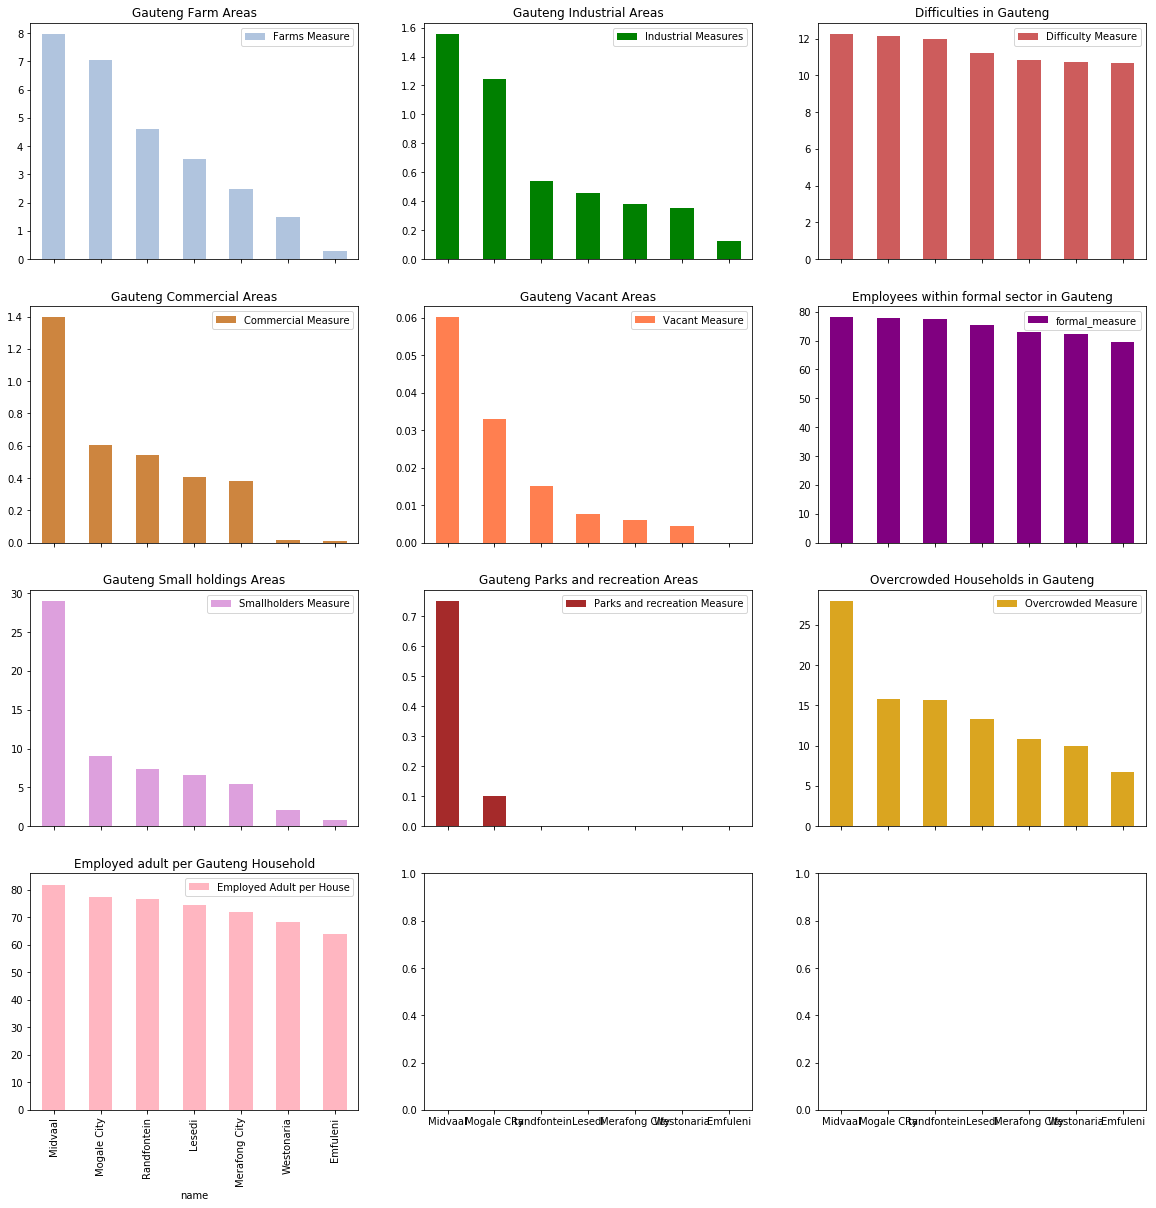

In [345]:
fig, axes = plt.subplots(nrows=4, ncols=3,sharex=True)
fig.set_figheight(20)
fig.set_figwidth(20)

dfDwellAreaGP.sort_values(by='farms_measure',ascending=False).plot(title="Gauteng Farm Areas", kind='bar',x="name",y="farms_measure",ax=axes[0,0], color="lightsteelblue", label="Farms Measure")
dfDwellAreaGP.sort_values(by='industry_measure',ascending=False).plot(title="Gauteng Industrial Areas", kind='bar',x="name",y="industry_measure",ax=axes[0,1],color='green',label="Industrial Measures")
dfDifficultyGP.sort_values(by='difficulty_measure',ascending=False).plot(title="Difficulties in Gauteng", kind='bar',x="name",y="difficulty_measure",ax=axes[0,2],color='indianred', label="Difficulty Measure")
 

dfDwellAreaGP.sort_values(by='commercial_measure',ascending=False).plot(title="Gauteng Commercial Areas", kind='bar',x="name",y="commercial_measure",ax=axes[1,0],color='peru',label="Commercial Measure") 
dfDwellAreaGP.sort_values(by='vacant_measure',ascending=False).plot(title="Gauteng Vacant Areas", kind='bar',x="name",y="vacant_measure",ax=axes[1,1], color="coral", label="Vacant Measure") 
dfEmploymentSectorGP.sort_values(by='formal_measure',ascending=False).plot(title="Employees within formal sector in Gauteng", kind='bar',x="name",y="formal_measure",ax=axes[1,2],color='purple')

dfDwellAreaGP.sort_values(by='smallholdings_measure',ascending=False).plot(title="Gauteng Small holdings Areas", kind='bar',x="name",y="smallholdings_measure",ax=axes[2,0],color='plum',label="Smallholders Measure") 
dfDwellAreaGP.sort_values(by='parks_measure',ascending=False).plot(title="Gauteng Parks and recreation Areas", kind='bar',x="name",y="parks_measure",ax=axes[2,1], color="brown", label="Parks and recreation Measure") 
dfCrowdedEmployGP.sort_values(by='overcrowded_measure',ascending=False).plot(title="Overcrowded Households in Gauteng", kind='bar',x="name",y="overcrowded_measure",ax=axes[2,2], color="goldenrod", label="Overcrowded Measure")

dfCrowdedEmployGP.sort_values(by='emp_per_house_measure',ascending=False).plot(title="Employed adult per Gauteng Household", kind='bar',x="name",y="emp_per_house_measure",ax=axes[3,0],color='lightpink',label="Employed Adult per House") 


#dfDwellAreaGP.sort_values(by='Informal residential',ascending=False).plot(title="Gauteng Informal residential Areas", kind='bar',x="name",y="Informal residential",ax=axes[1,2],color='plum') 
#dfDwellAreaGP.sort_values(by='Formal residential',ascending=False).plot(title="Gauteng Formal Residential Areas", kind='bar',x="name",y="Formal residential",ax=axes[0,2],color='r')  
#f4.sort_values(by='Traditional residential',ascending=False).plot(title="Gauteng Traditional residential Areas", kind='bar',x="name",y="Traditional residential",ax=axes[0,3],color='b')
#dfDwellAreaGP.sort_values(by='Collective living quarters',ascending=False).plot(title="Gauteng Collective living quarters Areas", kind='bar',x="name",y="Collective living quarters",ax=axes[1,1],color='b')
#df
#dfDwellAreaGP.sort_values(by='Traditional',ascending=False).plot(title="Gauteng Traditional Houses", kind='bar',x="name",y="Traditional",ax=axes[2,2],color='g') 
#dfDwellAreaGP.sort_values(by='formal_residential_measure',ascending=False).plot(title="Gauteng Formal Houses", kind='bar',x="name",y="formal_residential_measure",ax=axes[2,3],color='r',label="Formal Dwellings") 
#dfDwellAreaGP.sort_values(by='Informal not in backyard',ascending=False).plot(title="Gauteng Informal Houses but not in backyard", kind='bar',x="name",y="Informal not in backyard",ax=axes[3,0],color='r') 
#dfDwellAreaGP.sort_values(by='Informal in backyard',ascending=False).plot(title="Gauteng Informal Houses in backyard", kind='bar',x="name",y="Informal in backyard",ax=axes[3,1],color='b') 
#dfDwellAreaGP.sort_values(by='Other',ascending=False).plot(title="Gauteng Other types of Houses", kind='bar',x="name",y="Other",ax=axes[3,2],color='g') 
#dfEmploymentSectorGP.sort_values(by='Formal sector',ascending=False).plot(title="Employees within Formal sector in Gauteng ", kind='bar',x="name",y="Formal sector",ax=axes[3,3],color='g')
#dfEmploymentSectorGP.sort_values(by='Private household',ascending=False).plot(title="Employees within Private household in Gauteng", kind='bar',x="name",y="Private household",ax=axes[4,2],color='r') 
#f7.loc[:,'Communication':'Walking'].sum(axis =1).plot.bar(title="Difficulty in Municipalities", x="name", ax=axes[0,3],color='g')
plt.show()
